# Finch Carr - PHYS 434 Lab 03
## Asking a Statistical Question
- Consists of 3+ steps
  - 1. Writing down in words what you want to ask precisely
  - 2. Translating the question into mathematical expression, determining the PDF of the background, and the integrals to do to obtain a probability
  - 3. Converting the probability into an equivalent sigma
- We will assume that we know the form of the signal-free background distribution. In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses

## Problem 1
- Looking at the temperature reading (meta-data) associated with an experiment, the temperature should be at around 12 Kelvin. The data we have is mostly consistent with 12 Kelvin within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, the thermal control system misbehaved and the temperature was sometimes not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature).

In [77]:
# Creating a Normal Distribution with 'Bad Data' appended
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), 
              [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

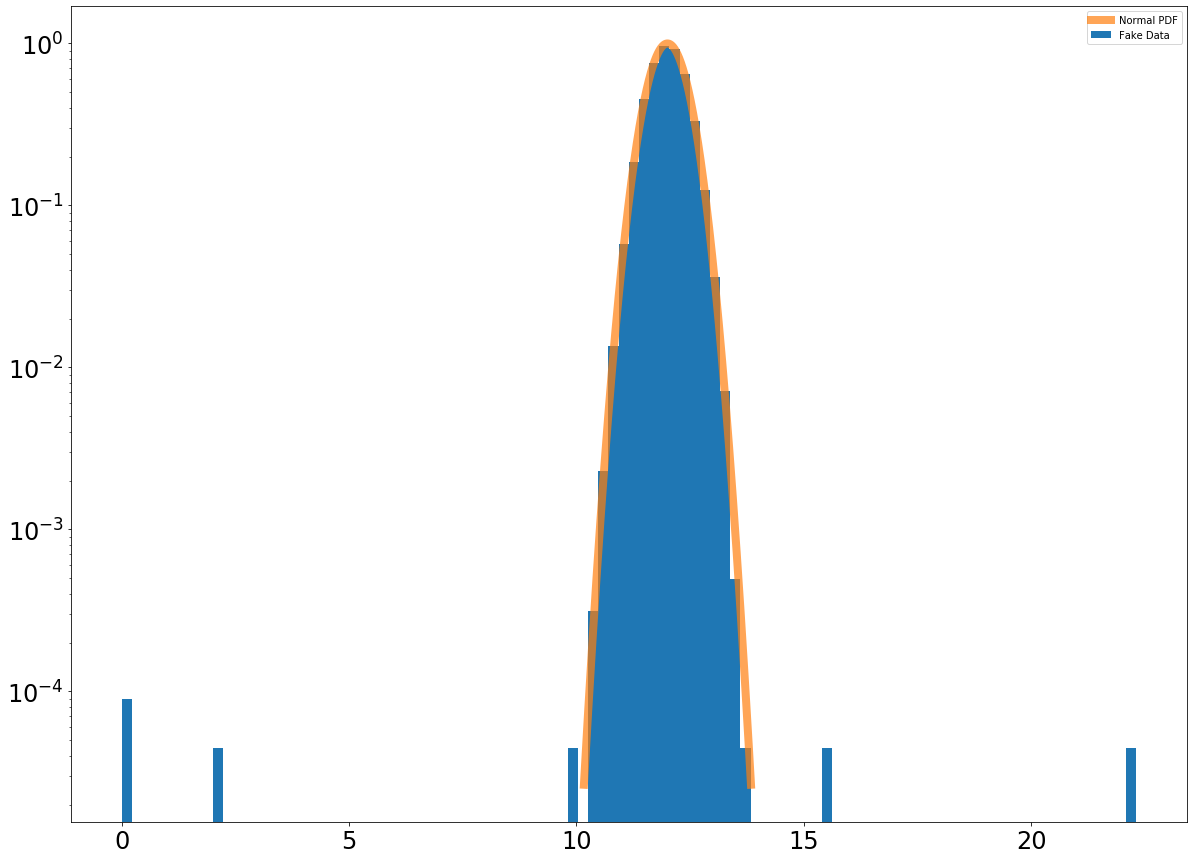

In [79]:
# Code given in Lab 03 Prompt
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)


fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, label='Fake Data')
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(stats.norm.ppf(0.001, 12, 0.4)-0.6, 
                stats.norm.ppf(.999, 12, 0.4)+0.6, 100008)
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = 0.4), linewidth = 8, alpha = 0.7, label='Normal PDF')
ax.legend(loc='best')
# plt.xlim(9, 16, 0.5)
plt.show()

- Our statistical question is as follows:
  - We want to design a test for our fake data such that the accuracy of identification of 'bad data points' is within a certain measurement of error such that the same test can be applied to real temperature data with a high degree of accuracy. 
  - Our test will involve identifying 'bad data' as opposed to 'good data' to fall within certain bounds
    - These bounds will be equal to 4 standard deviations from the mean to the left and 4 standard deviations to the right, such that we include almost 100% of the data from our normal distribution, while eliminating most of the 'bad data' glitches that lie outside the normal distribution itself.
  - The test will count in a for loop every value $x$ in the data array $[d]$, and if the value falls above 4 standard deviations to the right *or* falls below 4 standard deviations to the left, it will add 1 unit to a counter that tracks the data. Optimizing this counter's parameters (i.e. upper and lower bounds) will result in a count total as close to 8 as possible without going over (only for this data set, but optimizing it here will allow it to run better with any data set)
  - Conversely, the test will add one count to a 'good data' tracker when any $x$ value in $[d]$ that falls within 4 standard deviations of the mean, and optimization of this counter should result in 100000 values total without going over or falling short of that count.
- We also know that some 'bad data' falls within our bounds and some randomized good data might (however unlikely) fall outside of our bounds, but for 100000 values, misrepresenting a 'bad' value as a 'good' one is not as severe a mistake as counting a 'bad' value that lies outside the normal distribution. Similarly, counting a 'good' value as 'bad' outside of 4 standard deviations from the mean is not as severe as counting that value as 'bad' within 4 standard deviations
- Our question expressed mathematically can be found in the cell below

In [78]:
BadData = 0;
for x in range(len(d)):
    datapoint = d[x];
    if (datapoint > 13.6 or datapoint < 10.4):
        BadData = BadData+1;
        print(datapoint)
GoodData = 0;
for x in range(len(d)):
    datapoint = d[x];
    if (10.4 <= datapoint <= 13.6):
        GoodData = GoodData+1
        
BadData + GoodData, BadData, GoodData

13.603976999645404
10.0
10.3
2.1
0.0
0.0
15.6
22.3


(100008, 8, 100000)

### Problem 1A) Truth Tables

In [3]:
Truth = {'True T': [99999, 1],
        'Bad T': [1, 7]}
TruthFrame = pd.DataFrame(Truth, columns=['True T', 'Bad T'], 
                          index=['Our Test Good', 'Our Test Bad'])
TruthFrame

,True T,Bad T
Our Test Good,99999,1
Our Test Bad,1,7


### Problem 1B) 
- The number of omissions where we accidentally threw out good data depends on the limit we set our bounds at, which will separate 'good' data from 'bad'
- Setting the bounds at 4 standard deviations on each side ensures that we identify 99% of the 'good data' correctly, while also acknowledging that the data is randomized and therefore that some good data may be randomly generated as falling outside our set boundaries, but this is inconsequential since most data lies closer to the mean and our boundaries are far away from the mean, and also because only a small number of valid data points are accidentally omitted when the total amount of valid data points is 100000. 
    - Changing our boundaries would change the fraction of good data accidentally omitted by our test. 

### Problem 1C)
- Mistakes of commission can be avoided if the invalid data is far enough from the mean. Invalid data points that fall within four standard deviations of the mean cannot be eliminated by our test, but such totals of invalid data are so small, thus the totals of invalid data within our distribution are so small that having one or two mistakes of commission is negligible with 100000 data points. 

## Problem 2)
- In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if we histogram how far all the (stationary) stars appear to have moved, we get something like:

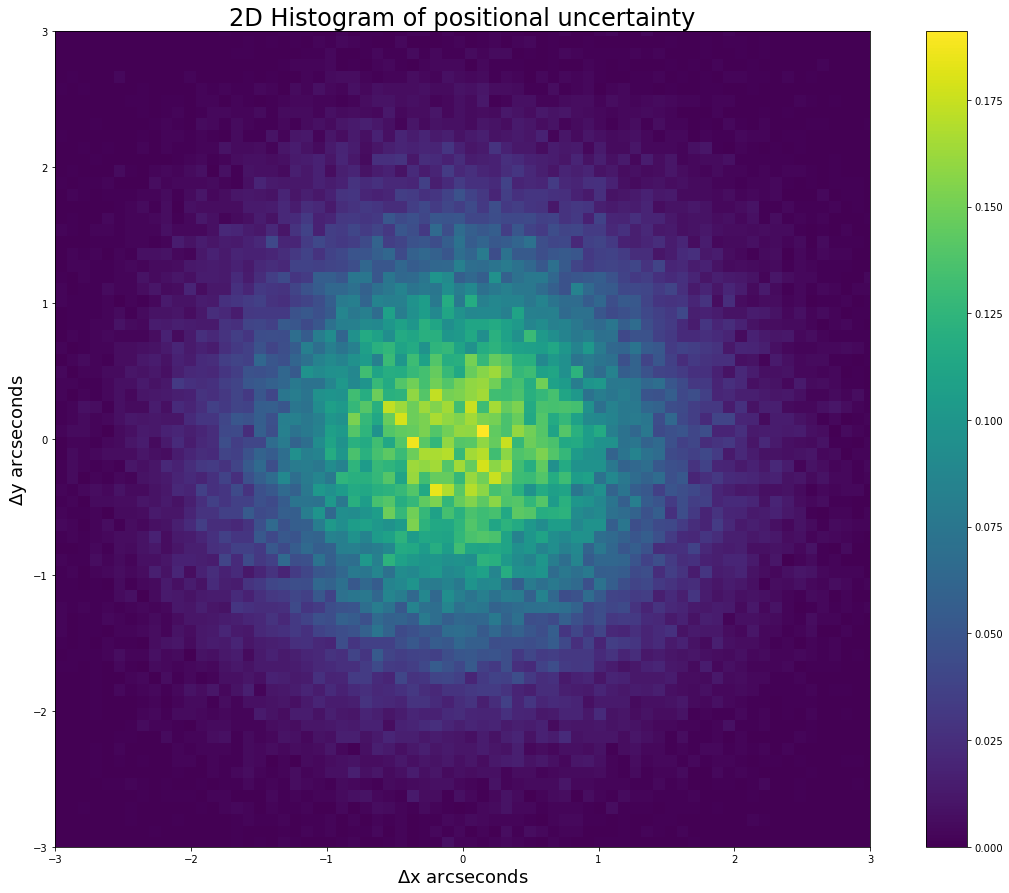

In [87]:
x = stats.norm.rvs(scale = 1, size = 100000)
y = stats.norm.rvs(scale = 1, size = 100000)

a = np.vstack((x, y))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### Problem 2A)
- ***Our question in words can be stated as follows:***
  - We want to find 5-sigma detection of movement within the probability values of our arcsecond 2D Gaussian distribution, which will take the form of the amplitude of any vector using $\sqrt{x^2 + y^2}$ whose probability values can then be found and plotted using a PDF

### Problem 2B)
- ***Question exressed mathematically can be found here:***

In [88]:
# I define my vector amplitude function here
def amplitude(x, y):
    result = np.sort(np.sqrt(x**2 + y**2))
    return result
amplitude(x, y)

array([4.20634450e-03, 9.36796914e-03, 9.88351902e-03, ...,
       4.64670848e+00, 4.80841143e+00, 4.86863282e+00])

Gamma Fit Parameters:
    alpha = 5.128297235718005
    loc = -0.2627256767166105
    scale = 0.29564249777387985


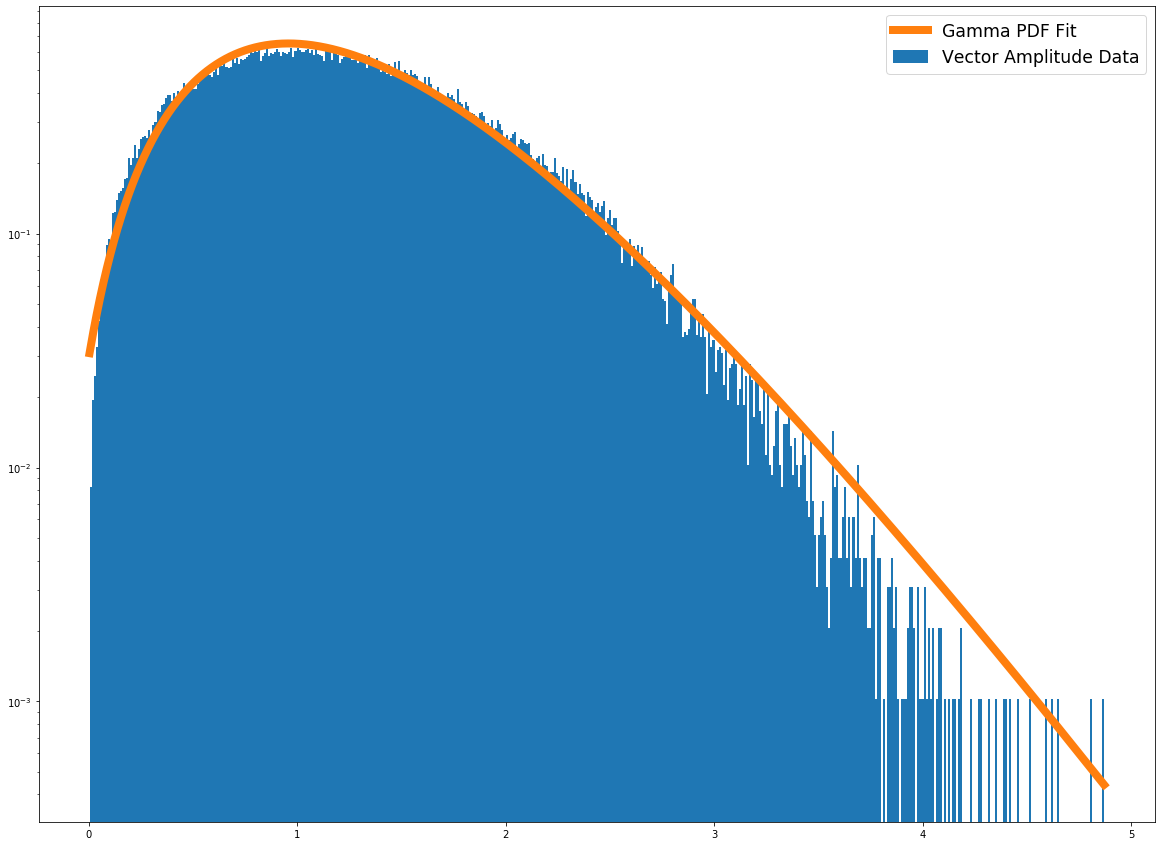

In [95]:
# I want to plot my amplitude distributions (all positive values) and a PDF fit of them
fig, ax = plt.subplots(1,1)
plt.yscale('log')

amp=np.sort(amplitude(x,y))

ax.hist(amp, 500, density=True, label='Vector Amplitude Data')

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(amp)
print('Gamma Fit Parameters:')
print(f'    alpha = {fit_alpha}')
print(f'    loc = {fit_loc}')
print(f'    scale = {fit_beta}')

xaxis = np.sort(np.linspace(0,6,100000))
ax.plot(amp, stats.gamma.pdf(amp, a=fit_alpha, loc=fit_loc, scale=fit_beta), lw=8, label='Gamma PDF Fit')


ax.legend(loc='best', fontsize='xx-large')
plt.show()

- Now we want to calculate a sigma value using the CDF of our gamma fit

In [97]:
sigma = 5
prob5 = stats.norm.sf(sigma, loc=0, scale=1)
prob5

2.866515718791933e-07

In [105]:
MeasureAmp = stats.gamma.ppf(1-prob5, a=fit_alpha, loc=fit_loc, scale=fit_beta)
print(f'A distance in arcseconds of {MeasureAmp} represents a 5 sigma')
print(f'detection of motion in our data')

A distance in arcseconds of 7.181794283747456 represents a 5 sigma
detection of motion in our data


### Problem 2C)
- We see that any coordinate pair of $\delta X$ and $\delta Y$ that has a magnitude of 7.182 arcseconds will represent a 5 sigma detection of motion, from our statistical calculations above.

## Problem 3
### Problem 3A)
- ***The question in words is:*** assuming we have a moon-sized patch in the sky that has a rate of 1 cosmic ray per minute (arrivals being randomized in time) and we observe the moon for 8 hours a night, for 15 days, and see 6800 cosmic rays, we want to find the significance of our moon shadow detection of those 6800 cosmic rays.
  - 1 ray per minute, 8 hours of observation, for 15 nights, measuring 6800 total cosmic rays. The number of rays that should appear can be calculated based on the rays per minute, multiplied by minutes in an hour, hours observed per day, days observed total
  - We can then compare the actual arrival of cosmic rays to the 

### Problem 3B)
- ***The question can be mathematically calculated below***

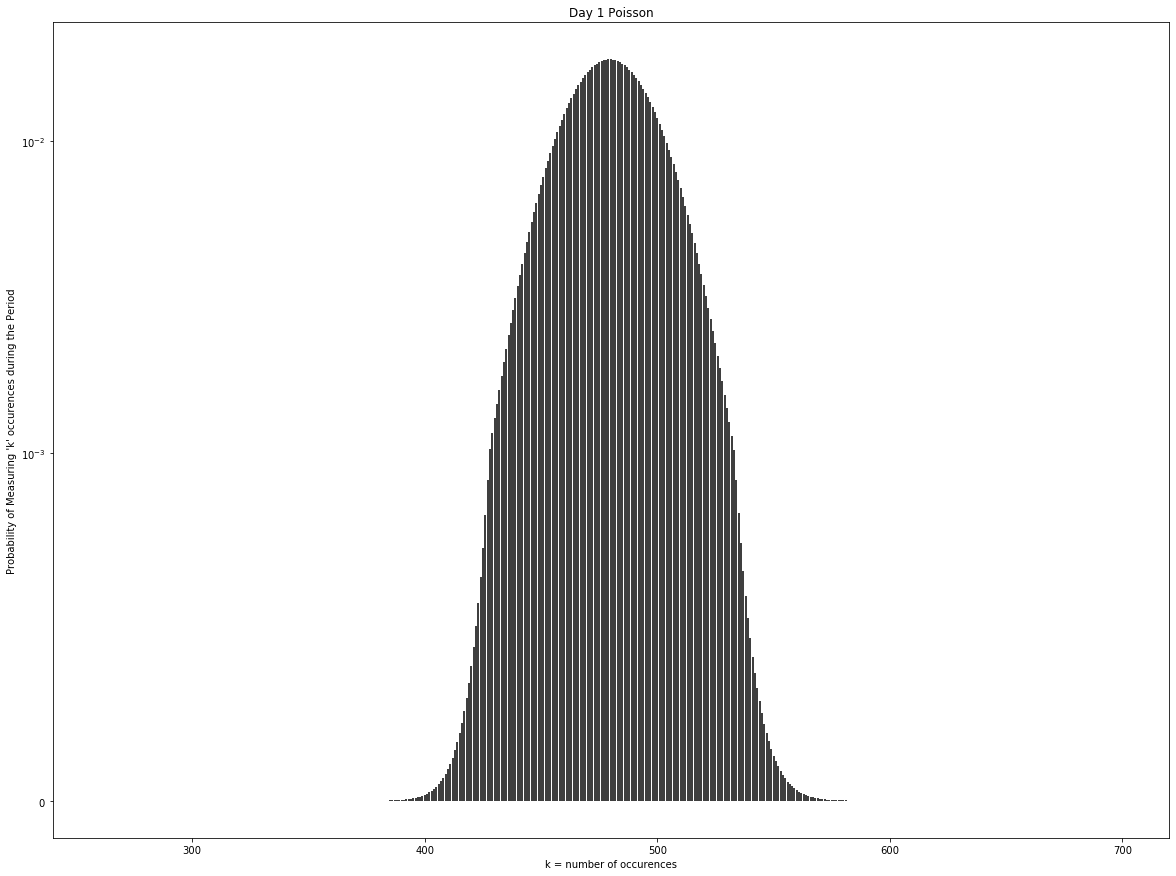

The mean value of cosmic rays observed during an observation period is 480 rays


In [116]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
muK = 1 * 60 * 8
k = np.arange(0,480*2,1)
Poisson1 = stats.poisson.pmf(k, mu=muK)
ax.vlines(k, 0, Poisson1, label='Poisson PMF for 1 Observation Night')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences during the Period')
plt.title('Day 1 Poisson')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
plt.xlim(240,480+240)
plt.show()
print(f'The mean value of cosmic rays observed during an observation period is {muK} rays')

In [111]:
muK

480

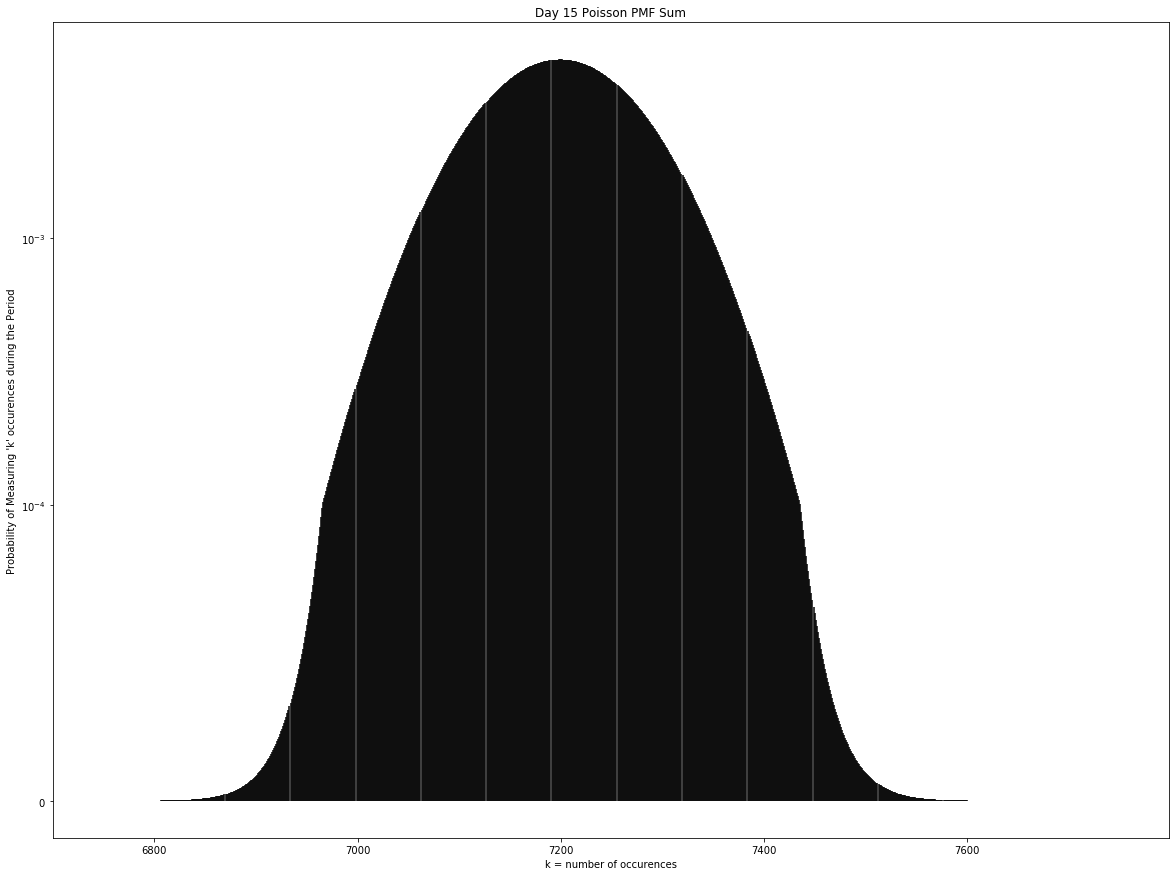

For 15 days of observation, we would expect to see an average of 7200 cosmic rays total


In [133]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
mu15 = 1*60*8*15
k15 = np.arange(6750, 7750, 1)
Poisson15 = stats.poisson.pmf(k15, mu=mu15)
ax.vlines(k15, 0, Poisson15, label='Poisson PMF for 15 Observation Nights')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences during the Period')
plt.title('Day 15 Poisson PMF Sum')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.0001)
#plt.xlim(6000,8000)
plt.show()
print(f'For 15 days of observation, we would expect to see an average of 7200 cosmic rays total')

In [143]:
# Now we want to calculate the significance associated with a measurement k of 6800
PoissonCDF = stats.poisson.cdf(6800, mu=mu15)
SigmaP = stats.norm.ppf(PoissonCDF, loc=0, scale=1)
SigmaP

-4.750747965777188

### Problem 3C)
- We have determined the significance of the measurement of 6800 cosmic rays per 15-day observation period is equal to a ***sigma value of 4.75***, which is not enough for us to consider the measurement as completely independent of the background distribution